In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA

### Loading the Dataset

In [2]:
# training data
bcells_csv = pd.read_csv('input_bcell.csv')
sars_csv = pd.read_csv('input_sars.csv')
# test data
covid_csv = pd.read_csv('input_covid.csv')

In [3]:
bcells_csv

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.220,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.860,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.280,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.320,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.640,6.867493,0.103846,-0.578846,21.684615,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14382,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,177,191,QVHAEQGLIQYPTAW,0.910,0.175,1.054,0.820,4.894836,0.071719,-0.701083,46.875237,0
14383,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,285,299,SSLAKHGEYAPFARL,0.966,0.216,1.044,1.160,4.894836,0.071719,-0.701083,46.875237,0
14384,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,189,203,TAWQSVGHMMVIFRL,0.821,0.023,1.044,-1.360,4.894836,0.071719,-0.701083,46.875237,0
14385,Q9QZS0,MHSKTAPRFLVFLLLTLLLLLAASPVASKGCVCKGKGQCLCAGTKG...,1479,1493,KRAHGQDLGTLGSCL,1.069,0.239,1.037,2.180,9.553040,0.044338,-0.671001,29.494308,0


In [4]:
sars_csv

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,17,MFIFLLFLTLTSGSDLD,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0
1,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,15,MFIFLLFLTLTSGSD,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0
2,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,2,10,FIFLLFLTL,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116,0
3,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,6,20,LFLTLTSGSDLDRCT,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116,0
4,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,9,25,TLTSGSDLDRCTTFDDV,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1231,1245,SCGSCCKFDEDDSEP,1.227,0.503,1.035,4.907,5.569763,0.116335,-0.061116,33.205116,0
516,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1234,1255,SCCKFDEDDSEPVLKGVKLHYT,1.047,0.606,1.064,2.577,5.569763,0.116335,-0.061116,33.205116,0
517,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1236,1255,CKFDEDDSEPVLKGVKLHYT,1.021,1.361,1.049,2.440,5.569763,0.116335,-0.061116,33.205116,1
518,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1236,1250,CKFDEDDSEPVLKGV,1.051,0.886,1.042,3.127,5.569763,0.116335,-0.061116,33.205116,0


In [5]:
covid_csv

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
0,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1,5,MGILP,0.948,0.280,1.033,-2.720,6.03595,0.10929,-0.138642,31.377603
1,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,2,6,GILPS,1.114,0.379,1.070,-0.580,6.03595,0.10929,-0.138642,31.377603
2,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,3,7,ILPSP,1.106,0.592,1.108,-1.300,6.03595,0.10929,-0.138642,31.377603
3,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,4,8,LPSPG,1.324,0.836,1.053,1.440,6.03595,0.10929,-0.138642,31.377603
4,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,5,9,PSPGM,1.326,1.004,0.968,2.440,6.03595,0.10929,-0.138642,31.377603
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20307,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1258,1277,YVRKDGEWVLLSTFLGHHHH,0.947,0.406,1.063,0.155,6.03595,0.10929,-0.138642,31.377603
20308,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1259,1278,VRKDGEWVLLSTFLGHHHHH,0.937,0.353,1.061,0.355,6.03595,0.10929,-0.138642,31.377603
20309,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1260,1279,RKDGEWVLLSTFLGHHHHHH,0.960,0.647,1.047,0.645,6.03595,0.10929,-0.138642,31.377603
20310,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1261,1280,KDGEWVLLSTFLGHHHHHHH,0.960,0.449,1.058,0.540,6.03595,0.10929,-0.138642,31.377603


In [6]:
bcells_sars_df = pd.concat([bcells_csv, sars_csv])
bcells_sars_df.reset_index(inplace = True)
bcells_sars_df.drop('index', axis = 1, inplace = True)
bcells_sars_df

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.220,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.860,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.280,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.320,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.640,6.867493,0.103846,-0.578846,21.684615,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14902,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1231,1245,SCGSCCKFDEDDSEP,1.227,0.503,1.035,4.907,5.569763,0.116335,-0.061116,33.205116,0
14903,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1234,1255,SCCKFDEDDSEPVLKGVKLHYT,1.047,0.606,1.064,2.577,5.569763,0.116335,-0.061116,33.205116,0
14904,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1236,1255,CKFDEDDSEPVLKGVKLHYT,1.021,1.361,1.049,2.440,5.569763,0.116335,-0.061116,33.205116,1
14905,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1236,1250,CKFDEDDSEPVLKGV,1.051,0.886,1.042,3.127,5.569763,0.116335,-0.061116,33.205116,0


### Exploratory Data Analysis

In [7]:
bcells_sars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14907 entries, 0 to 14906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parent_protein_id    14907 non-null  object 
 1   protein_seq          14907 non-null  object 
 2   start_position       14907 non-null  int64  
 3   end_position         14907 non-null  int64  
 4   peptide_seq          14907 non-null  object 
 5   chou_fasman          14907 non-null  float64
 6   emini                14907 non-null  float64
 7   kolaskar_tongaonkar  14907 non-null  float64
 8   parker               14907 non-null  float64
 9   isoelectric_point    14907 non-null  float64
 10  aromaticity          14907 non-null  float64
 11  hydrophobicity       14907 non-null  float64
 12  stability            14907 non-null  float64
 13  target               14907 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.6+ MB


In [8]:
bcells_sars_df.describe()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
count,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000,14907.000000
mean,308.845173,319.519420,0.994906,1.082811,1.021808,1.750098,7.015227,0.077143,-0.394063,43.337674,0.271148
std,358.433563,358.647859,0.123656,1.826098,0.053430,1.954424,1.875713,0.026388,0.392808,16.501627,0.444567
min,1.000000,6.000000,0.534000,0.000000,0.838000,-9.029000,3.686096,0.000000,-1.971171,5.448936,0.000000
25%,86.000000,96.000000,0.913000,0.244000,0.987000,0.600000,5.569763,0.062500,-0.600131,31.725753,0.000000
50%,197.000000,208.000000,0.991000,0.551000,1.021000,1.775000,6.447815,0.075949,-0.318259,41.948275,0.000000
75%,400.000000,411.000000,1.073000,1.208500,1.055000,2.960000,8.676575,0.093458,-0.189591,49.101172,1.000000
max,3079.000000,3086.000000,1.546000,40.605000,1.255000,9.120000,12.232727,0.182254,1.267089,137.046667,1.000000


In [9]:
bcells_sars_df.isnull().sum()

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

In [10]:
covid_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20312 entries, 0 to 20311
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parent_protein_id    20312 non-null  object 
 1   protein_seq          20312 non-null  object 
 2   start_position       20312 non-null  int64  
 3   end_position         20312 non-null  int64  
 4   peptide_seq          20312 non-null  object 
 5   chou_fasman          20312 non-null  float64
 6   emini                20312 non-null  float64
 7   kolaskar_tongaonkar  20312 non-null  float64
 8   parker               20312 non-null  float64
 9   isoelectric_point    20312 non-null  float64
 10  aromaticity          20312 non-null  float64
 11  hydrophobicity       20312 non-null  float64
 12  stability            20312 non-null  float64
dtypes: float64(8), int64(2), object(3)
memory usage: 2.0+ MB


In [11]:
covid_csv.describe()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
count,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000,20312.00000,2.031200e+04,2.031200e+04,2.031200e+04
mean,635.258369,646.741631,1.003054,0.999996,1.037257,1.334786,6.03595,1.092896e-01,-1.386417e-01,3.137760e+01
std,366.496487,366.496487,0.106191,1.287882,0.046677,1.539362,0.00000,4.163439e-17,5.551252e-17,7.105602e-15
min,1.000000,5.000000,0.596000,0.003000,0.837000,-7.317000,6.03595,1.092896e-01,-1.386417e-01,3.137760e+01
25%,318.000000,329.000000,0.935000,0.272000,1.008000,0.453000,6.03595,1.092896e-01,-1.386417e-01,3.137760e+01
50%,635.000000,647.000000,1.001000,0.587000,1.035000,1.406000,6.03595,1.092896e-01,-1.386417e-01,3.137760e+01
75%,953.000000,964.000000,1.067000,1.222000,1.064000,2.289000,6.03595,1.092896e-01,-1.386417e-01,3.137760e+01
max,1277.000000,1281.000000,1.538000,18.298000,1.282000,7.300000,6.03595,1.092896e-01,-1.386417e-01,3.137760e+01


In [12]:
covid_csv.isnull().sum()

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
dtype: int64

In [13]:
bs_columns = bcells_sars_df.columns
bs_columns

Index(['parent_protein_id', 'protein_seq', 'start_position', 'end_position',
       'peptide_seq', 'chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker',
       'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability',
       'target'],
      dtype='object')

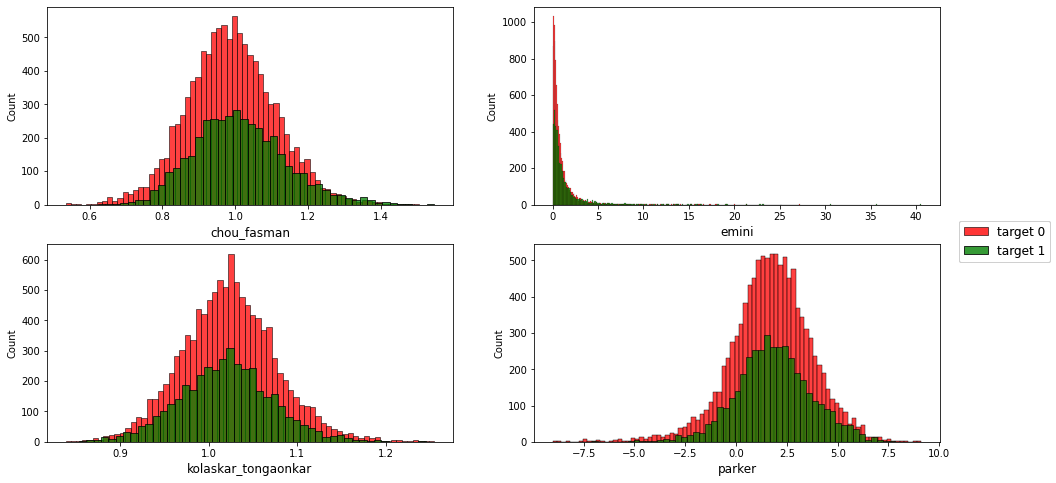

In [14]:
epitopes = bcells_sars_df['target'].astype("bool").values
fig, ax = plt.subplots(2, 2, figsize=(16,8))

ax = [x for a in ax for x in a]

for i,name in enumerate(["chou_fasman","emini","kolaskar_tongaonkar","parker"]):
    value = bcells_sars_df[name]
    sns.histplot(value[~epitopes],
                 ax = ax[i],
                 color = 'r')
    sns.histplot(value[epitopes],
                 ax = ax[i],
                 color = 'g')
    ax[i].set_xlabel(name, 
                     fontsize=12)
    fig.legend(labels = ["target 0", "target 1"], 
               loc = "right", 
               fontsize=12)

### Deriving Features

In [15]:
bcells_sars_df

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.220,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.860,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.280,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.320,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.640,6.867493,0.103846,-0.578846,21.684615,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14902,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1231,1245,SCGSCCKFDEDDSEP,1.227,0.503,1.035,4.907,5.569763,0.116335,-0.061116,33.205116,0
14903,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1234,1255,SCCKFDEDDSEPVLKGVKLHYT,1.047,0.606,1.064,2.577,5.569763,0.116335,-0.061116,33.205116,0
14904,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1236,1255,CKFDEDDSEPVLKGVKLHYT,1.021,1.361,1.049,2.440,5.569763,0.116335,-0.061116,33.205116,1
14905,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1236,1250,CKFDEDDSEPVLKGV,1.051,0.886,1.042,3.127,5.569763,0.116335,-0.061116,33.205116,0


In [16]:
bs_columns

Index(['parent_protein_id', 'protein_seq', 'start_position', 'end_position',
       'peptide_seq', 'chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker',
       'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability',
       'target'],
      dtype='object')

In [17]:
bs_columns = bcells_sars_df.drop(['parent_protein_id', 'protein_seq', 'start_position', 'end_position', 'peptide_seq'], axis = 1).columns

peptide_features = bcells_sars_df[bs_columns[:4]]
protein_features = bcells_sars_df[bs_columns[4:-1]]
protein_features

,isoelectric_point,aromaticity,hydrophobicity,stability
0,5.810364,0.103275,-0.143829,40.273300
1,6.210876,0.065476,-0.036905,24.998512
2,8.223938,0.091787,0.879227,27.863333
3,4.237976,0.044776,-0.521393,30.765373
4,6.867493,0.103846,-0.578846,21.684615
...,...,...,...,...
14902,5.569763,0.116335,-0.061116,33.205116
14903,5.569763,0.116335,-0.061116,33.205116
14904,5.569763,0.116335,-0.061116,33.205116
14905,5.569763,0.116335,-0.061116,33.205116


### Model Creation

In [18]:
x = bcells_sars_df.drop(['parent_protein_id', 'protein_seq', 'peptide_seq', 'target'], axis = 1)
y = bcells_sars_df['target']

In [19]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.41248964, -0.43085327,  0.17059166, ...,  0.99030857,
         0.6370607 , -0.18570755],
       [-0.16138866, -0.17990233, -1.81886423, ..., -0.44215442,
         0.90927409, -1.11139206],
       [-0.45712982, -0.47546677, -1.15571227, ...,  0.55497566,
         3.24161723, -0.93777781],
       ...,
       [ 2.58677206,  2.6084415 ,  0.21102775, ...,  1.48525355,
         0.84763685, -0.61405449],
       [ 2.58677206,  2.59449978,  0.45364433, ...,  1.48525355,
         0.84763685, -0.61405449],
       [ 2.60072212,  2.6084415 ,  0.26763829, ...,  1.48525355,
         0.84763685, -0.61405449]])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [21]:
accuracy_rate = []

for i in range(1, 40):
    knn_acc = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn_acc,
                            x_train,
                            y_train,
                            cv = 5)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

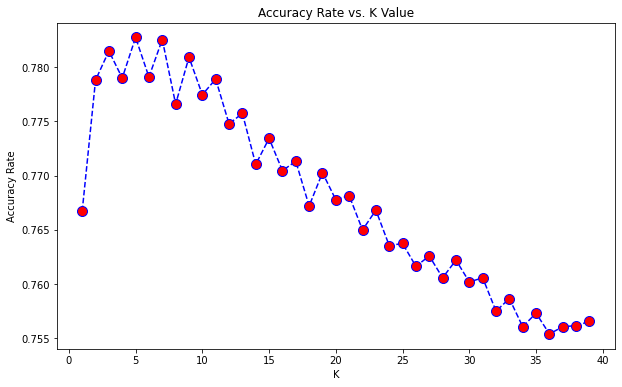

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [27]:
optimal_k = accuracy_rate.index(max(accuracy_rate)) + 1
print("Optimal K Values w/ Highest Accuracy: {0}".format(optimal_k))

Optimal K Values w/ Highest Accuracy: 5


In [28]:
knn_bs = KNeighborsClassifier(n_neighbors = optimal_k)
knn_bs.fit(x_train, y_train)

KNeighborsClassifier()

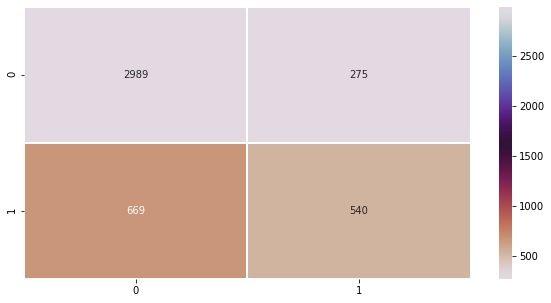

In [45]:
prediction = knn_bs.predict(x_test)
bs_cm = confusion_matrix(y_test, prediction)

plt.figure(figsize = (10, 5))
sns.heatmap(bs_cm,
            annot = True,
            fmt = 'd',
            linewidths = 1,
            cmap = 'twilight_r')
plt.show()

In [47]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86      3264
           1       0.66      0.45      0.53      1209

    accuracy                           0.79      4473
   macro avg       0.74      0.68      0.70      4473
weighted avg       0.78      0.79      0.77      4473



### Tuning the Model

In [49]:
# applying feature importance
feature_importance = ExtraTreesClassifier()

feature_importance.fit(x, y)

ExtraTreesClassifier()

In [50]:
acc_feats = feature_importance.feature_importances_
acc_feats

array([0.10620772, 0.10702884, 0.08781178, 0.08657512, 0.08388922,
       0.08755975, 0.11768965, 0.11662036, 0.10298213, 0.10363542])

In [58]:
x.columns

Index(['start_position', 'end_position', 'chou_fasman', 'emini',
       'kolaskar_tongaonkar', 'parker', 'isoelectric_point', 'aromaticity',
       'hydrophobicity', 'stability'],
      dtype='object')

In [63]:
important_features = []

for feature, importance in zip(x.columns, acc_feats):
    print('Feature {0} Importance: {1:.2f} %'.format(feature, importance))
    if importance >= 0.1:
        important_features.append(feature)

Feature start_position Importance: 0.11 %
Feature end_position Importance: 0.11 %
Feature chou_fasman Importance: 0.09 %
Feature emini Importance: 0.09 %
Feature kolaskar_tongaonkar Importance: 0.08 %
Feature parker Importance: 0.09 %
Feature isoelectric_point Importance: 0.12 %
Feature aromaticity Importance: 0.12 %
Feature hydrophobicity Importance: 0.10 %
Feature stability Importance: 0.10 %


['start_position',
 'end_position',
 'isoelectric_point',
 'aromaticity',
 'hydrophobicity',
 'stability']

In [67]:
x2 = bcells_sars_df[important_features]
y2 = bcells_sars_df['target']

In [68]:
x2_scaled = scaler.fit_transform(x2, y2)
x2_scaled

array([[-0.41248964, -0.43085327, -0.64237125,  0.99030857,  0.6370607 ,
        -0.18570755],
       [-0.16138866, -0.17990233, -0.42883846, -0.44215442,  0.90927409,
        -1.11139206],
       [-0.45712982, -0.47546677,  0.64442248,  0.55497566,  3.24161723,
        -0.93777781],
       ...,
       [ 2.58677206,  2.6084415 , -0.77064711,  1.48525355,  0.84763685,
        -0.61405449],
       [ 2.58677206,  2.59449978, -0.77064711,  1.48525355,  0.84763685,
        -0.61405449],
       [ 2.60072212,  2.6084415 , -0.77064711,  1.48525355,  0.84763685,
        -0.61405449]])

In [69]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2_scaled, y2, 
                                                        test_size = 0.3,
                                                        random_state = 42)

In [70]:
accuracy_rate2 = []

for i in range(1, 40):
    knn_acc2 = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn_acc2,
                            x2_train,
                            y2_train,
                            cv = 5)
    accuracy_rate2.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

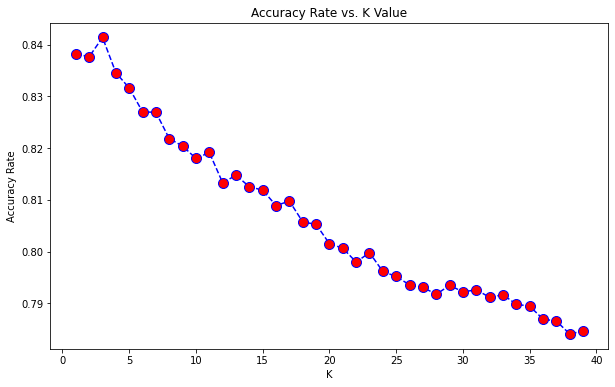

In [71]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate2,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [73]:
optimal_k = accuracy_rate2.index(max(accuracy_rate2)) + 1
print("Optimal K Values w/ Highest Accuracy: {0}".format(optimal_k))

Optimal K Values w/ Highest Accuracy: 3


In [74]:
knn_bs = KNeighborsClassifier(n_neighbors = optimal_k)
knn_bs.fit(x2_train, y2_train)

KNeighborsClassifier(n_neighbors=3)

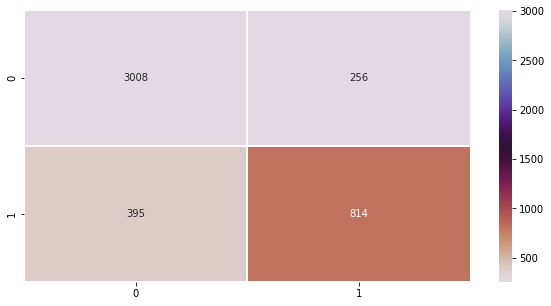

In [75]:
prediction = knn_bs.predict(x2_test)
bs_cm2 = confusion_matrix(y2_test, prediction)

plt.figure(figsize = (10, 5))
sns.heatmap(bs_cm2,
            annot = True,
            fmt = 'd',
            linewidths = 1,
            cmap = 'twilight_r')
plt.show()

In [76]:
print(classification_report(y2_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3264
           1       0.76      0.67      0.71      1209

    accuracy                           0.85      4473
   macro avg       0.82      0.80      0.81      4473
weighted avg       0.85      0.85      0.85      4473



### Visualization of the Result

In [122]:
# using the tuned model
target_values = y2_test

bs_results = pd.DataFrame(data = x2_test,
                          columns = x2.columns)
bs_results['labels'] = y2_test.reset_index().drop('index', axis = 1)
bs_results['prediction'] = prediction
bs_results

,start_position,end_position,isoelectric_point,aromaticity,hydrophobicity,stability,labels,prediction
0,-0.437600,-0.433642,0.709829,-2.021216,-0.021177,-1.488478,0,0
1,-0.649641,-0.639979,-0.056181,0.795179,0.161719,-0.467028,1,1
2,0.312913,0.308058,-0.146449,0.866211,-0.789375,-0.615478,0,0
3,-0.551990,-0.542387,-0.687733,1.972310,-0.129966,-0.013442,0,0
4,-0.677541,-0.687381,-1.564448,-2.923537,-2.225461,2.963569,0,0
...,...,...,...,...,...,...,...,...
4468,-0.563150,-0.559117,-0.816790,1.117003,1.022884,-1.073622,0,0
4469,-0.727761,-0.737571,0.434730,-2.297133,-0.118212,0.150324,0,0
4470,-0.540830,-0.545175,-0.738887,0.791902,0.350540,-1.047759,0,0
4471,0.351973,0.347095,1.161561,0.230347,0.319434,0.078289,0,0


In [121]:
bs_visual = bs_results.drop(['ground truth labels', 'prediction'], axis = 1)
pca = PCA(n_components = 2)
pca_components = pca.fit_transform(bs_visual)

In [124]:
pca_df = pd.DataFrame(pca_components,
                      columns = ['pca 1', 'pca 2'])
pca_df['labels'] = bs_results['labels']
pca_df['prediction'] = bs_results['prediction']
pca_df

,pca 1,pca 2,labels,prediction
0,-1.128207,-0.405230,0,0
1,-0.252042,-1.020766,1,1
2,0.715237,0.149011,0,0
3,0.337413,-0.959698,0,0
4,-2.649746,2.871372,0,0
...,...,...,...,...
4468,0.553424,-2.001267,0,0
4469,-1.927566,0.301685,0,0
4470,0.272758,-1.473148,0,0
4471,0.146606,0.265320,0,0


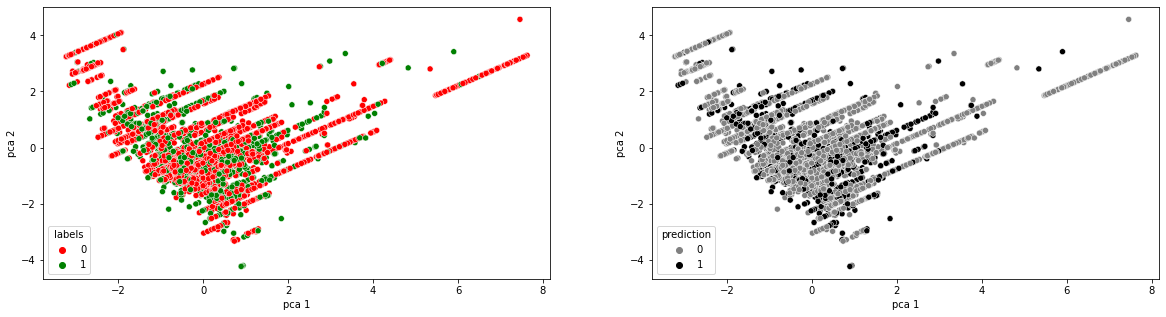

In [137]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
sns.scatterplot(x = pca_df['pca 1'],
                y = pca_df['pca 2'],
                hue = pca_df['labels'],
                palette = ['red', 'green'],
                ax = ax[0])
sns.scatterplot(x = pca_df['pca 1'],
                y = pca_df['pca 2'],
                hue = pca_df['prediction'],
                palette = ['gray', 'black'],
                ax = ax[1])
plt.show()